In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data
file_path = "AREOJET_DATA_CW1 (S).csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
df.isnull().sum()

,0
Ref,0
id,0
Gender,0
Satisfied,0
Age,0
Age Band,0
Type of Travel,0
Class,0
Flight Distance,0
Destination,0


In [ ]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("/", "_").str.replace("-", "_")
print("Cleaned column names:")
print(df.columns)

Cleaned column names:
Index(['Ref', 'id', 'Gender', 'Satisfied', 'Age', 'Age_Band', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Destination', 'Continent',
       'Inflight_wifi_service', 'Departure_Arrival_time_convenient',
       'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On_board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'],
      dtype='object')


In [ ]:
# Handle missing values
df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].median(), inplace=True)

In [ ]:
# Encode target
df['Satisfied'] = df['Satisfied'].map({'Y': 1, 'N': 0})

In [ ]:
# Drop unneeded IDs
df.drop(['Ref', 'id'], axis=1, inplace=True)

In [ ]:
# Categorical encoding
categorical_cols = ['Gender', 'Age_Band', 'Type_of_Travel', 'Class', 'Destination', 'Continent']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# Split data
X = df_encoded.drop('Satisfied', axis=1)
y = df_encoded['Satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis

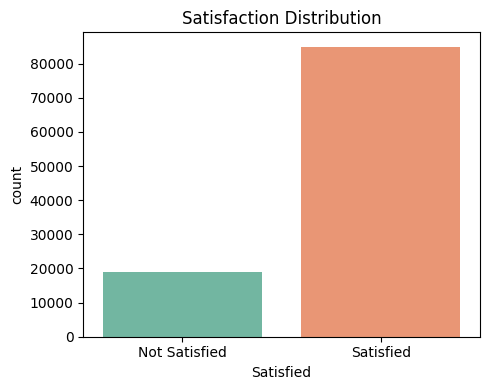

In [ ]:
# Satisfaction Distribution
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Satisfied', palette='Set2')
plt.title('Satisfaction Distribution')
plt.xticks([0, 1], ['Not Satisfied', 'Satisfied'])
plt.tight_layout()
plt.show()

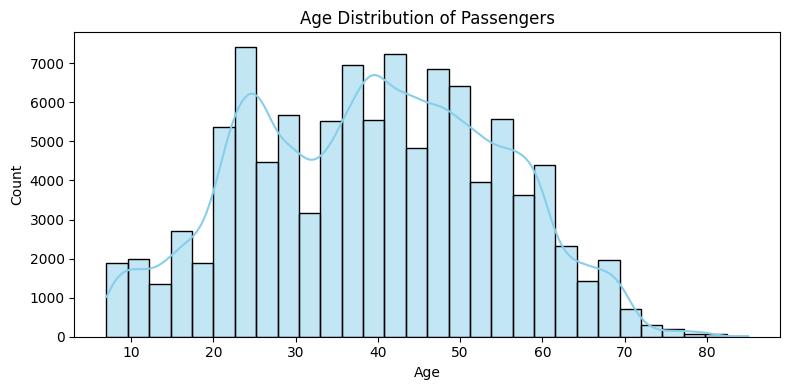

In [ ]:
# Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.tight_layout()
plt.show()

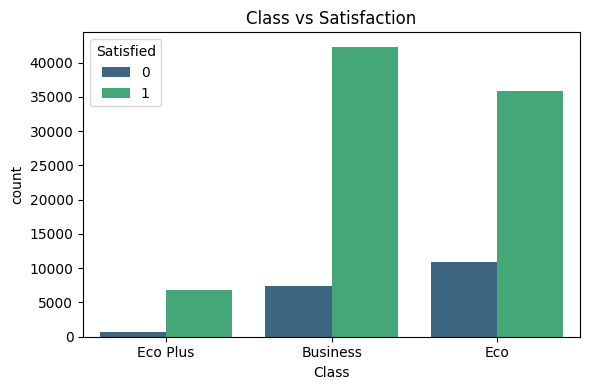

In [ ]:
# Class vs Satisfaction
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', hue='Satisfied', palette='viridis')
plt.title('Class vs Satisfaction')
plt.tight_layout()
plt.show()

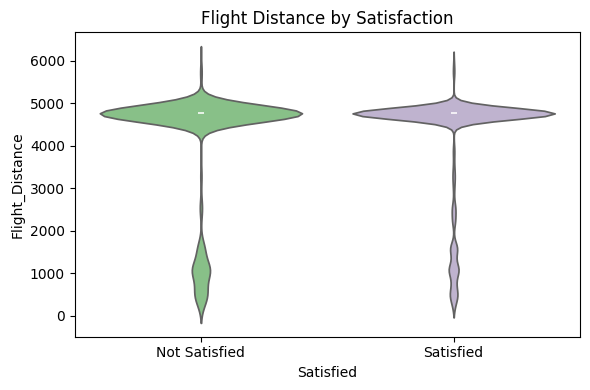

In [ ]:
# Flight Distance by Satisfaction
plt.figure(figsize=(6, 4))
sns.violinplot(data=df_encoded, x='Satisfied', y='Flight_Distance', palette='Accent')
plt.title('Flight Distance by Satisfaction')
plt.xticks([0, 1], ['Not Satisfied', 'Satisfied'])
plt.tight_layout()
plt.show()

<Figure size 1000x1200 with 0 Axes>

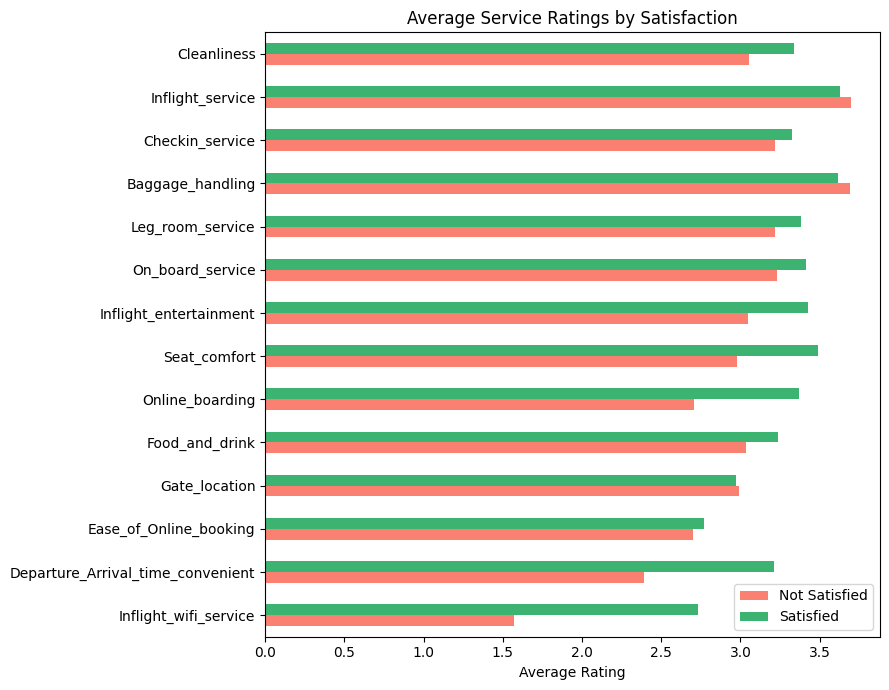

In [ ]:
# Average Ratings of Services by Satisfaction
service_features = [
    'Inflight_wifi_service', 'Departure_Arrival_time_convenient',
    'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',
    'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
    'On_board_service', 'Leg_room_service', 'Baggage_handling',
    'Checkin_service', 'Inflight_service', 'Cleanliness'
]

mean_ratings = df.groupby('Satisfied')[service_features].mean().T
mean_ratings.columns = ['Not Satisfied', 'Satisfied']

plt.figure(figsize=(10, 12))
mean_ratings.plot(kind='barh', figsize=(9, 7), color=['salmon', 'mediumseagreen'])
plt.title('Average Service Ratings by Satisfaction')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

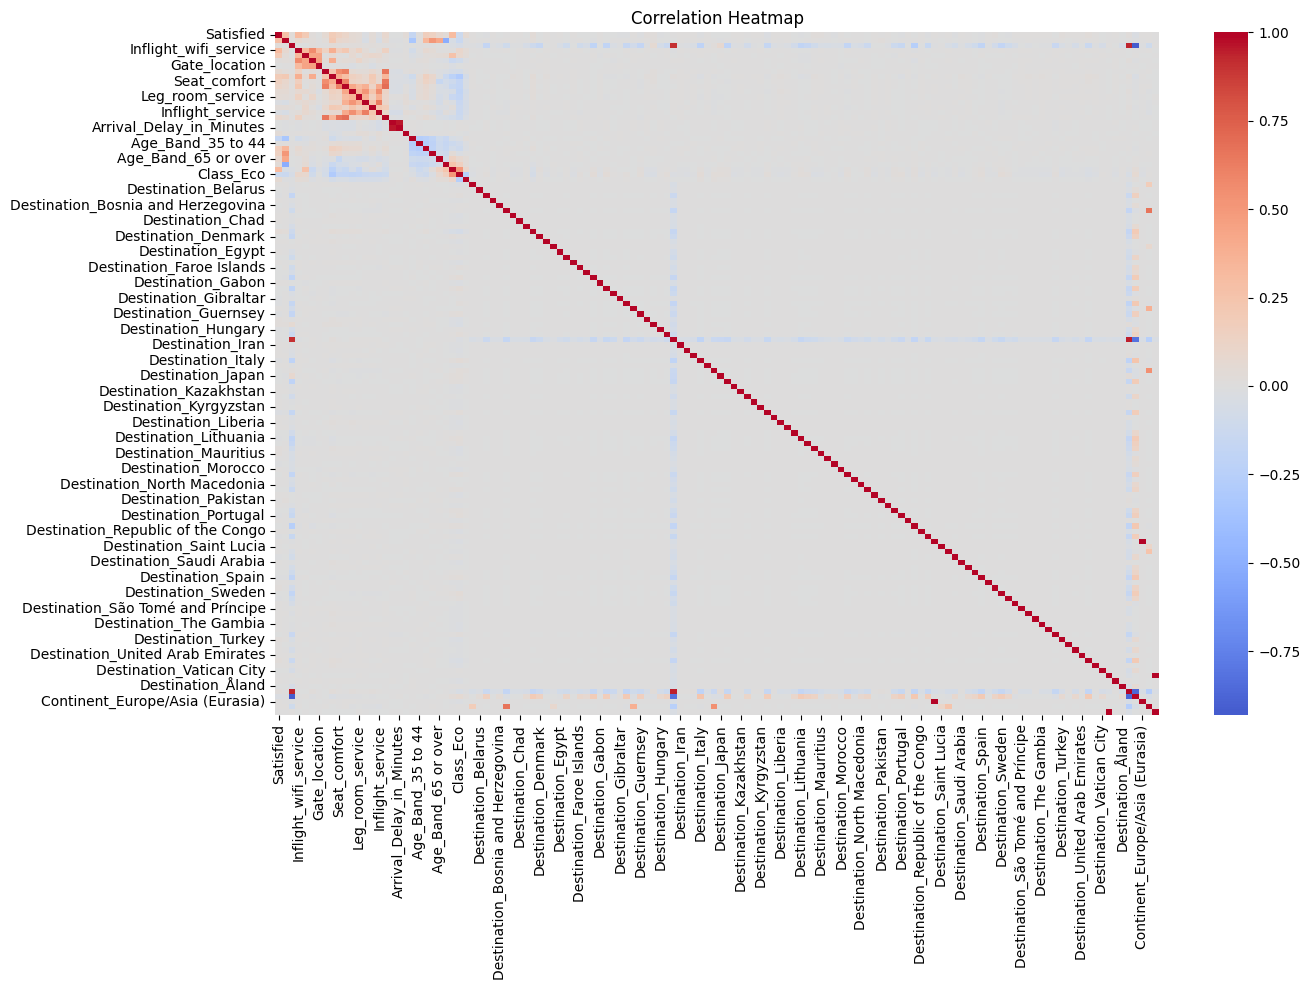

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


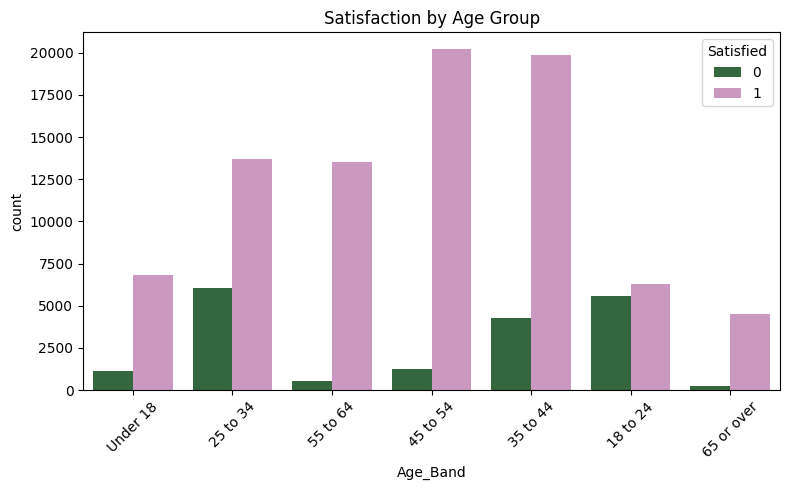

In [ ]:
# Satisfaction by Age Band
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Age_Band', hue='Satisfied', palette='cubehelix')
plt.title('Satisfaction by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

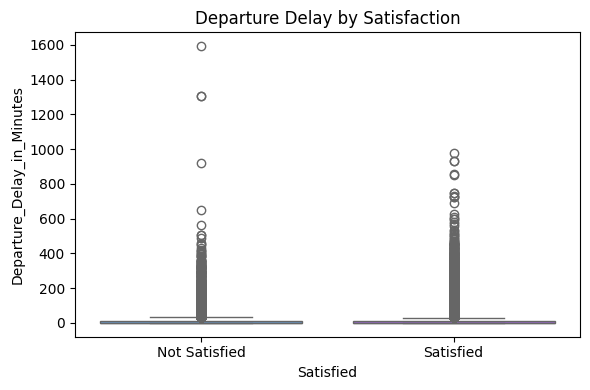

In [ ]:
# Departure Delay vs Satisfaction
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Satisfied', y='Departure_Delay_in_Minutes', palette='cool')
plt.title('Departure Delay by Satisfaction')
plt.xticks([0, 1], ['Not Satisfied', 'Satisfied'])
plt.tight_layout()
plt.show()


In [ ]:
# Model 1: Logistic Regression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [ ]:
# Model 2: Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:

# Evaluation Function

def evaluate_model(name, y_true, y_pred):
    print(f" Evaluation for: {name}")
    print(" Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print(" F1 Score:", round(f1_score(y_true, y_pred), 4))
    print(" Classification Report:\n", classification_report(y_true, y_pred))
        # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.grid(False)
    plt.show()


 Evaluation for: Logistic Regression
 Accuracy: 0.9248
 F1 Score: 0.9544
 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79      3775
           1       0.95      0.96      0.95     17006

    accuracy                           0.92     20781
   macro avg       0.88      0.86      0.87     20781
weighted avg       0.92      0.92      0.92     20781



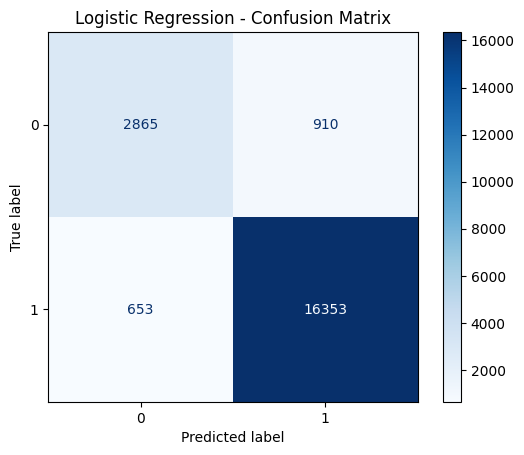

 Evaluation for: Random Forest
 Accuracy: 0.9831
 F1 Score: 0.9897
 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      3775
           1       0.98      1.00      0.99     17006

    accuracy                           0.98     20781
   macro avg       0.98      0.96      0.97     20781
weighted avg       0.98      0.98      0.98     20781



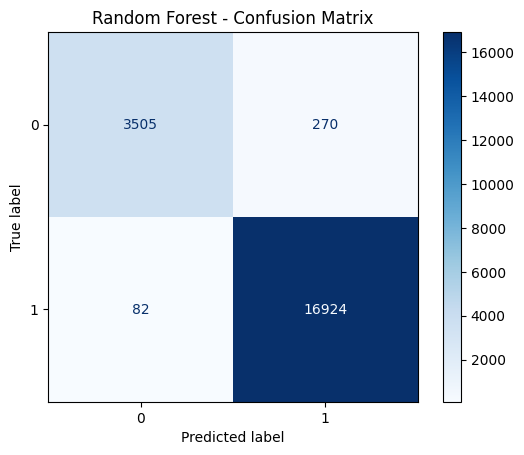

In [ ]:
# Evaluate both models
evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Random Forest", y_test, rf_preds)

In [ ]:
# Summary Table
from sklearn.metrics import precision_score, recall_score

summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, log_preds), accuracy_score(y_test, rf_preds)],
    'F1 Score': [f1_score(y_test, log_preds), f1_score(y_test, rf_preds)],
    'Precision': [precision_score(y_test, log_preds), precision_score(y_test, rf_preds)],
    'Recall': [recall_score(y_test, log_preds), recall_score(y_test, rf_preds)]
})

print(" Summary Comparison:")
display(summary)

 Summary Comparison:


,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.924787,0.954390,0.947286,0.961602
1,Random Forest,0.983061,0.989708,0.984297,0.995178


In [ ]:
from sklearn.metrics import log_loss

# Find log loss
log_loss_train_log = log_model.predict_proba(X_train)[:, 1]
log_loss_test_log = log_model.predict_proba(X_test)[:, 1]
log_loss_logreg = log_loss(y_test, log_loss_test_log)

log_loss_train_rf = rf_model.predict_proba(X_train)[:, 1]
log_loss_test_rf = rf_model.predict_proba(X_test)[:, 1]
log_loss_rf = log_loss(y_test, log_loss_test_rf)

# summary table
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, log_preds), accuracy_score(y_test, rf_preds)],
    'Log Loss': [log_loss_logreg, log_loss_rf]
})

print(" Summary Comparison:")
display(summary)

 Summary Comparison:


,Model,Accuracy,Log Loss
0,Logistic Regression,0.924787,0.210620
1,Random Forest,0.983061,0.085548


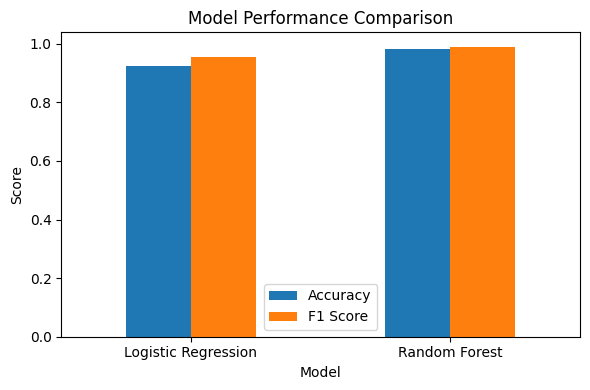

In [ ]:
# Comparison Plot
summary.set_index('Model').plot(kind='bar', figsize=(6, 4))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()